In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from teeplot import teeplot as tp
import numpy as np
import scipy.stats as stats

# get data

In [43]:
reg = pd.read_csv("regulation.csv")
no_reg = pd.read_csv("no-regulation.csv")

reg['regulation'] = "enabled"
no_reg['regulation'] = "disabled"

df = pd.concat([reg, no_reg])
df

,Unnamed: 0,update,mean_fitness,min_fitness,max_fitness,inferiority,replicate,regulation
0,0,0,3.127,0,6,0.521167,1,enabled
1,1,1,4.698,3,7,0.671143,1,enabled
2,2,2,4.947,3,7,0.706714,1,enabled
3,3,3,5.118,3,7,0.731143,1,enabled
4,4,4,5.112,3,9,0.568000,1,enabled
...,...,...,...,...,...,...,...,...
31468,31468,2971,13.404,2,15,0.893600,20,disabled
31469,31469,2972,13.384,2,15,0.892267,20,disabled
31470,31470,2973,13.235,1,15,0.882333,20,disabled
31471,31471,2974,13.365,2,15,0.891000,20,disabled


# define teeplot functions

In [44]:
def logx_lineplot(*args, **kwargs):
    g = sns.lineplot(
        *args,
        **kwargs
    )
    g.set_xscale("log")
    plt.axhline(256, c="grey", linestyle="dotted", zorder=-1)
    y = np.array([16*i for i in range(17)])
    plt.yticks(y)
    # todo: change names here

# fitness over time

## process data

In [45]:

'''
new_rows = []
for (replicate, regulation), filtered in df.groupby(["replicate", "regulation"]):
    max_update = filtered["update"].max()

    for update in range(max_update, 10000):
        new_rows.append({
            "update": update,
            "max_fitness": 16,
            "replicate": replicate,
            "regulation": regulation
})

df = df.append(new_rows)
df
'''

'\nnew_rows = []\nfor (replicate, regulation), filtered in df.groupby(["replicate", "regulation"]):\n    max_update = filtered["update"].max()\n\n    for update in range(max_update, 10000):\n        new_rows.append({\n            "update": update,\n            "max_fitness": 16,\n            "replicate": replicate,\n            "regulation": regulation\n})\n\ndf = df.append(new_rows)\ndf\n'

## graph results (ci: SD)

teeplots/ci=sd+hue=regulation+viz=logx-lineplot+x=update+y=max-fitness+ext=.pdf
teeplots/ci=sd+hue=regulation+viz=logx-lineplot+x=update+y=max-fitness+ext=.png


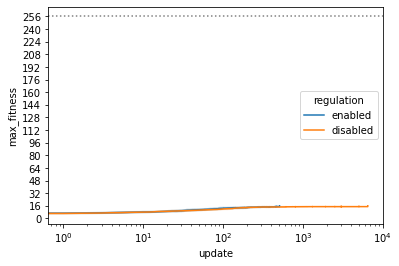

In [46]:
tp.tee(
    logx_lineplot,
    data=df,
    x="update",
    y="max_fitness",
    ci="sd",
    hue="regulation"
)

## graph results (ci: 95%)

In [47]:
data = df[np.log2(df["update"]+1) % 1.0 < 0.0001]
len(data)

376

In [48]:
'''
tp.tee(
    logx_lineplot,
    data=df,
    x="update",
    y="max_fitness",
    hue="regulation"
)
'''

'\ntp.tee(\n    logx_lineplot,\n    data=df,\n    x="update",\n    y="max_fitness",\n    hue="regulation"\n)\n'

# time to solution over number of states (k)

### process data

In [49]:
x = (df["max_fitness"] != df["max_fitness"].shift()).cumsum()
for a, b in zip(x, df["max_fitness"]):
    print(a, b)

1 6
2 7
2 7
2 7
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
3 9
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
4 10
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
6 12
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
8 14
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 15
9 

In [50]:
df = df.sort_values(by=["replicate", "regulation", "update"])

df["streak_length"] = df.groupby(
    (df["max_fitness"] != df["max_fitness"].shift()).cumsum()
).cumcount() + 1

<AxesSubplot:>

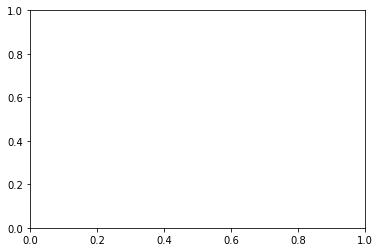

In [51]:
sns.lineplot(
    data=df[(df["replicate"] == 7) & (df["regulation"] == 1)],
    y="streak_length",
    x="update",
    ci=None,
    hue="max_fitness"
)

In [52]:
box_df = df[(df["max_fitness"] == 16)]

res_df = []
for (replicate, regulation), filtered in box_df.groupby(["replicate", "regulation"]):
    sol_time = filtered["update"].min()
    print(replicate, sol_time, "reg:", regulation)
    res_df.append({
        "solution_time": sol_time,
        "replicate": replicate,
        "regulation": regulation
    })

all_pairs = {item for item, filtered in df.groupby(["replicate", "regulation"])}
sol_pairs = {item for item, filtered in box_df.groupby(["replicate", "regulation"])}

for (replicate, regulation) in all_pairs - sol_pairs:
    sol_time = 10000
    print(replicate, sol_time, "reg:", regulation)
    res_df.append({
        "solution_time": sol_time,
        "replicate": replicate,
        "regulation": regulation
    })

res_df = df.from_records(res_df)

1 405 reg: disabled
1 370 reg: enabled
2 2506 reg: disabled
2 381 reg: enabled
3 5028 reg: disabled
3 92 reg: enabled
4 803 reg: disabled
4 452 reg: enabled
5 347 reg: disabled
5 509 reg: enabled
6 6494 reg: disabled
6 102 reg: enabled
7 358 reg: disabled
7 313 reg: enabled
8 411 reg: disabled
8 174 reg: enabled
9 283 reg: disabled
9 185 reg: enabled
10 273 reg: disabled
10 470 reg: enabled
11 360 reg: disabled
11 171 reg: enabled
12 245 reg: disabled
12 470 reg: enabled
13 1918 reg: disabled
13 279 reg: enabled
14 3045 reg: disabled
14 227 reg: enabled
15 1314 reg: disabled
15 144 reg: enabled
16 613 reg: disabled
16 332 reg: enabled
17 3017 reg: disabled
17 457 reg: enabled
18 324 reg: disabled
18 186 reg: enabled
19 734 reg: disabled
19 471 reg: enabled
20 2975 reg: disabled
20 348 reg: enabled


### graph

teeplots/viz=boxplot+x=regulation+y=solution-time+ext=.pdf
teeplots/viz=boxplot+x=regulation+y=solution-time+ext=.png


<AxesSubplot:xlabel='regulation', ylabel='solution_time'>

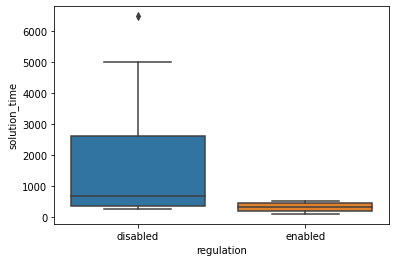

In [53]:
tp.tee(
    sns.boxplot,
    data=res_df,
    y="solution_time",
    x="regulation"
)

## time to solution (swarm plot)

In [54]:
def tee_swarmplot(*args, **kwargs):
    sns.swarmplot(
        linewidth=0.5,
        s=4,
        edgecolor='white',
        *args,
        **kwargs
    )
    sns.boxplot(
        *args,
        **kwargs
    )

teeplots/viz=tee-swarmplot+x=regulation+y=solution-time+ext=.pdf
teeplots/viz=tee-swarmplot+x=regulation+y=solution-time+ext=.png


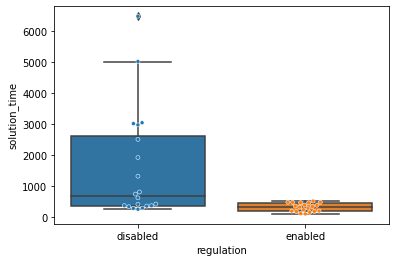

In [58]:
res_df["Solution Time"] = res_df["solution_time"]
res_df["Regulation"] = res_df["regulation"]


tp.tee(
    tee_swarmplot,
    data=res_df,
    y="Solution Time",
    x="Regulation"
)

In [59]:
def tee_barswarm(*args, **kwargs):
    sns.swarmplot(
        linewidth=0.5,
        s=4,
        edgecolor='white',
        *args,
        **kwargs
    )
    sns.barplot(
        capsize=0.4,
        errwidth=2,
        *args,
        **kwargs
    )

teeplots/viz=tee-barswarm+x=regulation+y=solution-time+ext=.pdf
teeplots/viz=tee-barswarm+x=regulation+y=solution-time+ext=.png


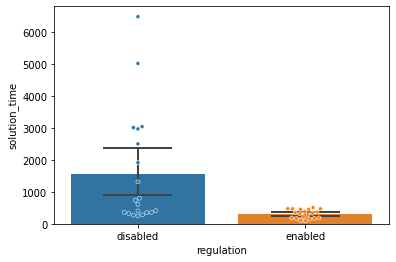

In [60]:
tp.tee(
    tee_barswarm,
    data=res_df,
    y="solution_time",
    x="regulation"
)